Depth Anything V2 

In [48]:
import git
git.Repo.clone_from('https://github.com/DepthAnything/Depth-Anything-V2', 'Depth-Anything-V2')

<git.repo.base.Repo '/home/s5708799/Desktop/24-25/ASE_Project/Depth-Anything-V2/metric_depth/Depth-Anything-V2/.git'>

In [ ]:
%cd Depth-Anything-V2
%pip install -r requirements.txt

Below Code requires downloading the checkpoints first to run

/tmp/ipykernel_75417/1014535302.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_{encoder}.pth', map_loc

Test_Images_2/20241201_103112052_iOS(1).png
<class 'numpy.ndarray'>


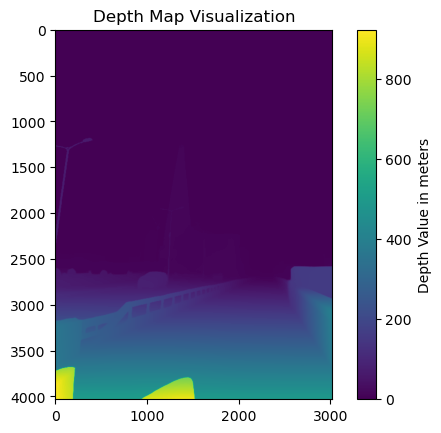

Test_Images_2/20241201_103112052_iOS(1).json
Test_Images_2/20240809_120935828_iOS.png
<class 'numpy.ndarray'>


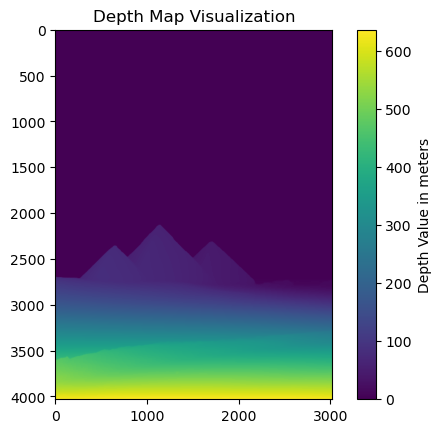

Test_Images_2/20240809_120935828_iOS.json
Test_Images_2/20240809_120937837_iOS.png
<class 'numpy.ndarray'>


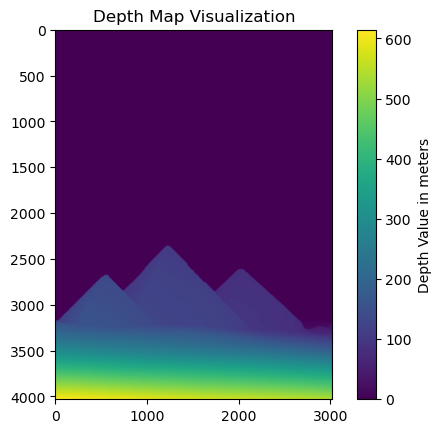

Test_Images_2/20240809_120937837_iOS.json
Test_Images_2/20240809_132311393_iOS.png
<class 'numpy.ndarray'>


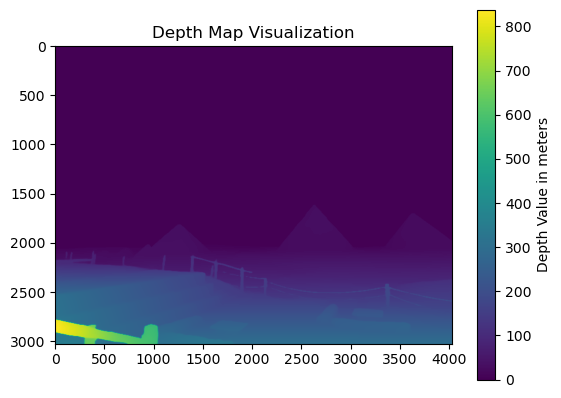

Test_Images_2/20240809_132311393_iOS.json
Test_Images_2/20240809_132314328_iOS.png
<class 'numpy.ndarray'>


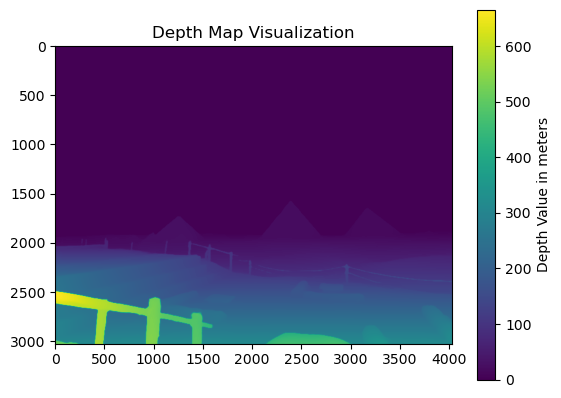

Test_Images_2/20240809_132314328_iOS.json
Test_Images_2/20241121_111331369_iOS.png
<class 'numpy.ndarray'>


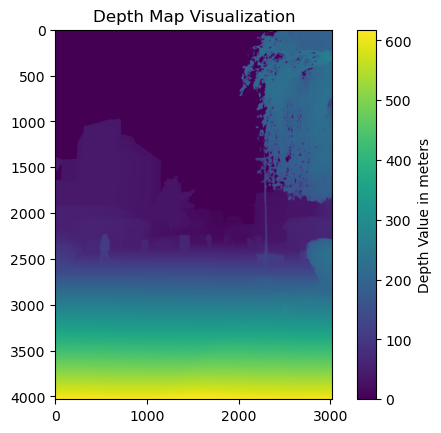

Test_Images_2/20241121_111331369_iOS.json
Test_Images_2/20241121_111656922_iOS.png
<class 'numpy.ndarray'>


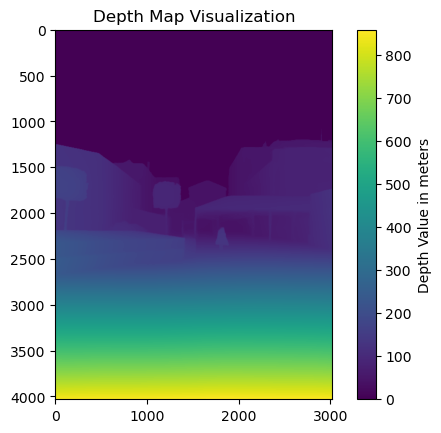

Test_Images_2/20241121_111656922_iOS.json
Test_Images_2/20241121_111658039_iOS.png
<class 'numpy.ndarray'>


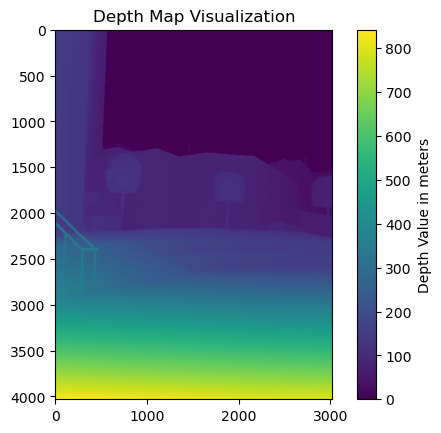

Test_Images_2/20241121_111658039_iOS.json
Test_Images_2/20241130_121251297_iOS.png
<class 'numpy.ndarray'>


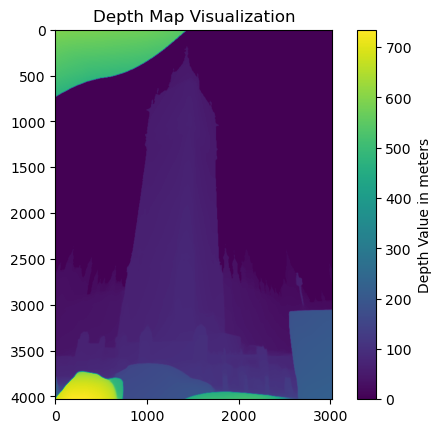

Test_Images_2/20241130_121251297_iOS.json
Test_Images_2/20241130_121305621_iOS(1).png
<class 'numpy.ndarray'>


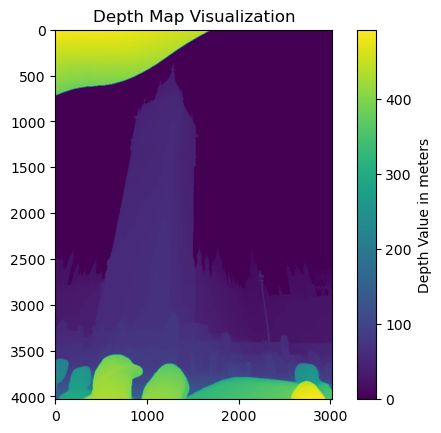

Test_Images_2/20241130_121305621_iOS(1).json
Test_Images_2/20241130_134449167_iOS(1).png
<class 'numpy.ndarray'>


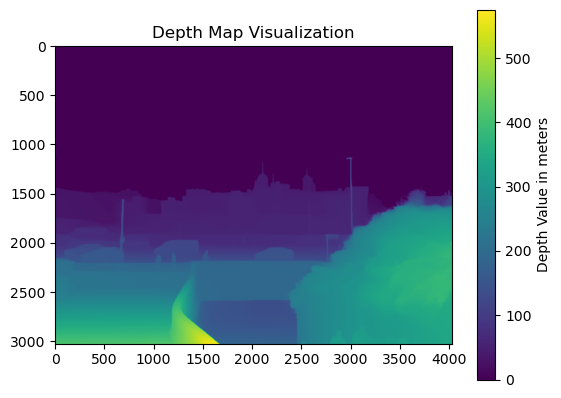

Test_Images_2/20241130_134449167_iOS(1).json
Test_Images_2/20241130_135146389_iOS.png
<class 'numpy.ndarray'>


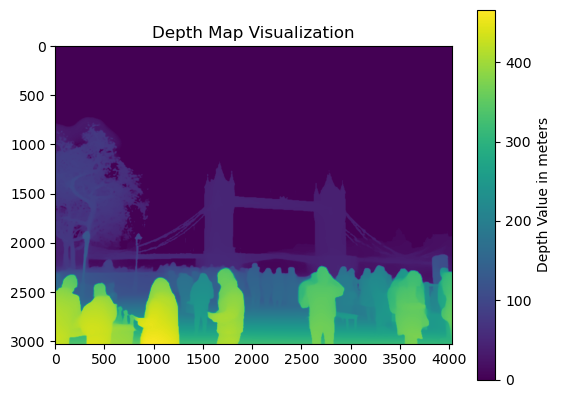

Test_Images_2/20241130_135146389_iOS.json
Test_Images_2/20241130_135147684_iOS.png
<class 'numpy.ndarray'>


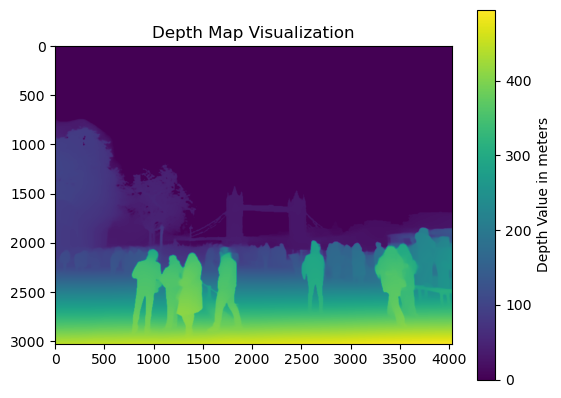

Test_Images_2/20241130_135147684_iOS.json
Test_Images_2/20241130_135154025_iOS.png
<class 'numpy.ndarray'>


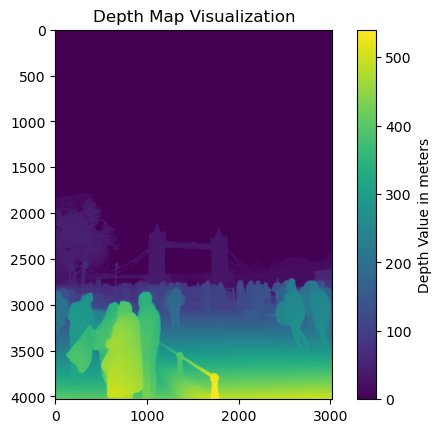

Test_Images_2/20241130_135154025_iOS.json
Test_Images_2/20241130_135459341_iOS.png
<class 'numpy.ndarray'>


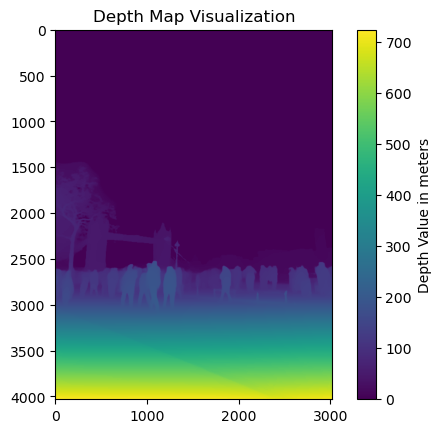

Test_Images_2/20241130_135459341_iOS.json
Test_Images_2/20241201_114118731_iOS.png
<class 'numpy.ndarray'>


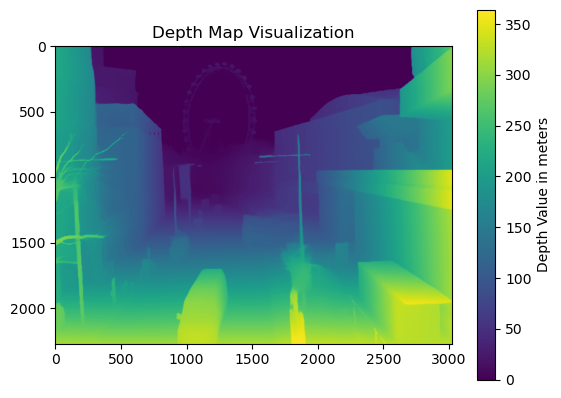

Test_Images_2/20241201_114118731_iOS.json
Test_Images_2/20241201_114121174_iOS 1.png
<class 'numpy.ndarray'>


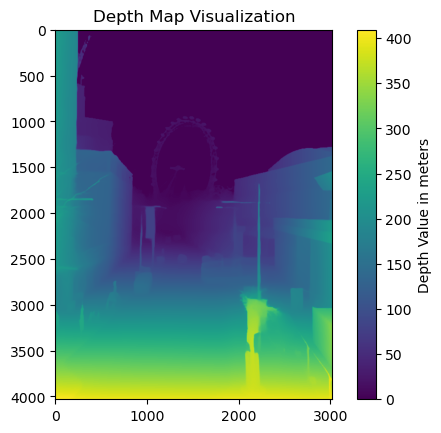

Test_Images_2/20241201_114121174_iOS 1.json
Test_Images_2/20241201_114121174_iOS(1).png
<class 'numpy.ndarray'>


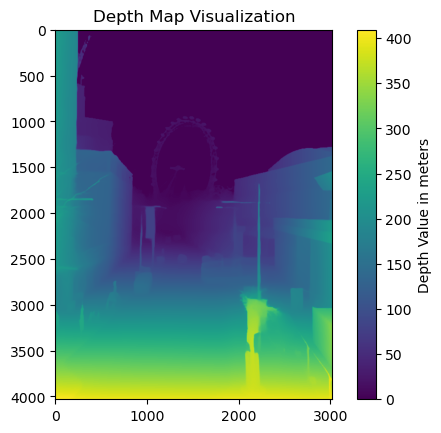

Test_Images_2/20241201_114121174_iOS(1).json
Test_Images_2/20241201_114121174_iOS.png
<class 'numpy.ndarray'>


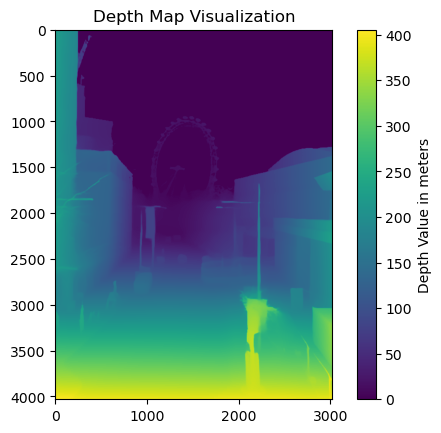

Test_Images_2/20241201_114121174_iOS.json
Test_Images_2/20241201_114123147_iOS 1.png
<class 'numpy.ndarray'>


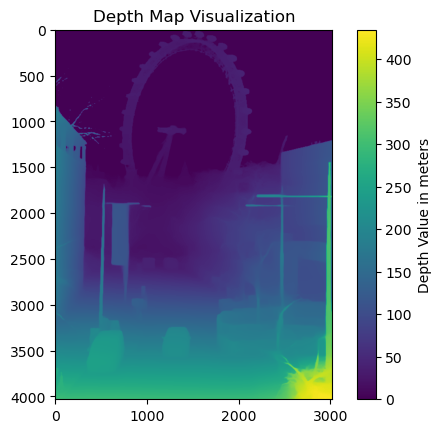

Test_Images_2/20241201_114123147_iOS 1.json
Test_Images_2/20241201_114123147_iOS(1).png
<class 'numpy.ndarray'>


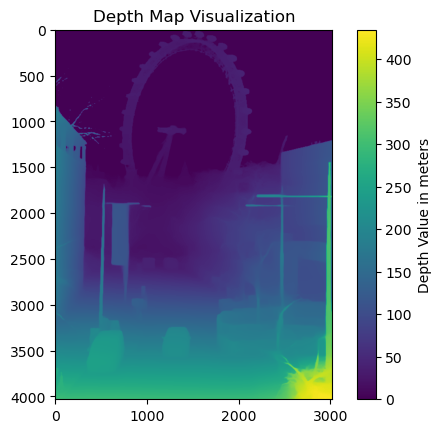

Test_Images_2/20241201_114123147_iOS(1).json
Test_Images_2/20241201_114123147_iOS.png
<class 'numpy.ndarray'>


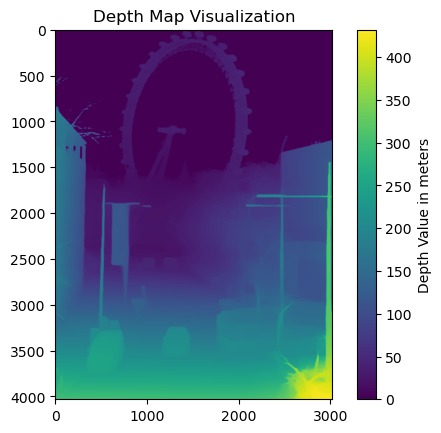

Test_Images_2/20241201_114123147_iOS.json
Test_Images_2/20241201_114127539_iOS(1).png
<class 'numpy.ndarray'>


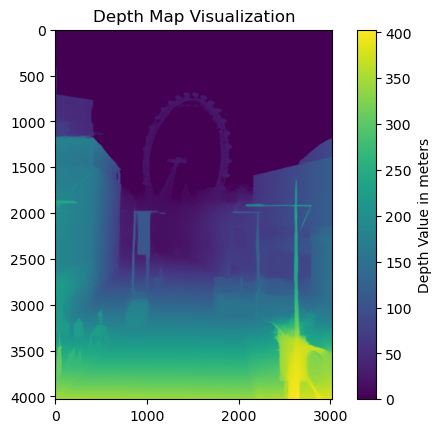

Test_Images_2/20241201_114127539_iOS(1).json
Test_Images_2/20241201_114127539_iOS.png
<class 'numpy.ndarray'>


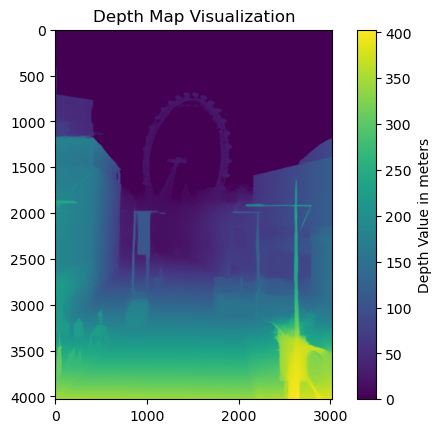

Test_Images_2/20241201_114127539_iOS.json
Test_Images_2/20241201_114353772_iOS.png
<class 'numpy.ndarray'>


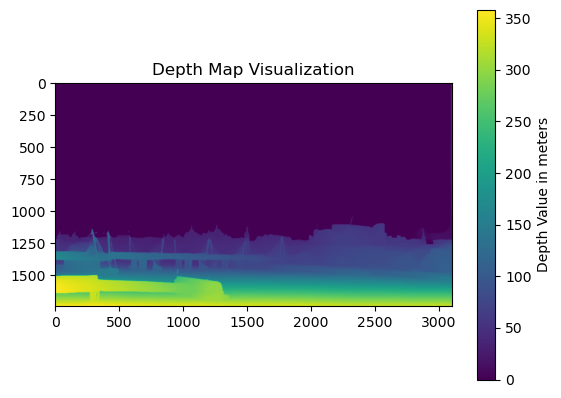

Test_Images_2/20241201_114353772_iOS.json
Test_Images_2/20241201_114354635_iOS.png
<class 'numpy.ndarray'>


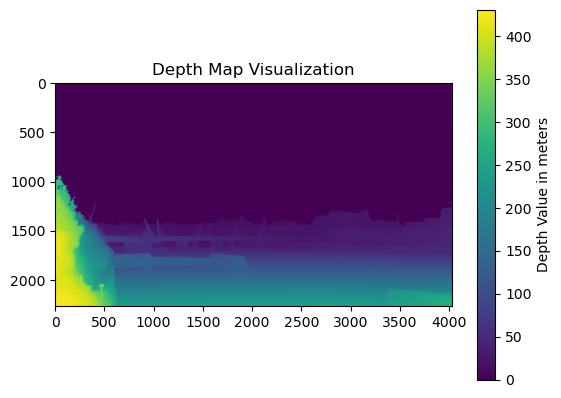

Test_Images_2/20241201_114354635_iOS.json
Test_Images_2/20241201_114357434_iOS 1.png
<class 'numpy.ndarray'>


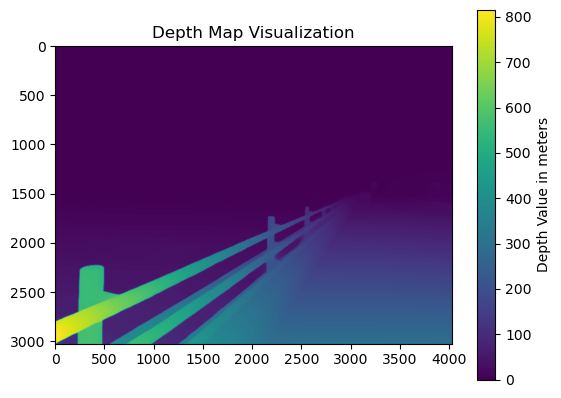

Test_Images_2/20241201_114357434_iOS 1.json
Test_Images_2/20241201_141121097_iOS.png
<class 'numpy.ndarray'>


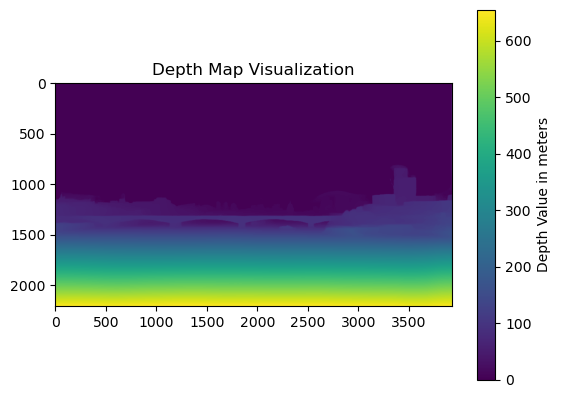

Test_Images_2/20241201_141121097_iOS.json
Test_Images_2/20241201_141122223_iOS.png
<class 'numpy.ndarray'>


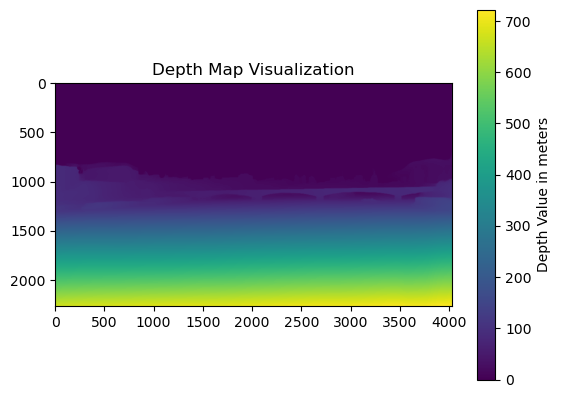

Test_Images_2/20241201_141122223_iOS.json
Test_Images_2/20241201_145402433_iOS.png
<class 'numpy.ndarray'>


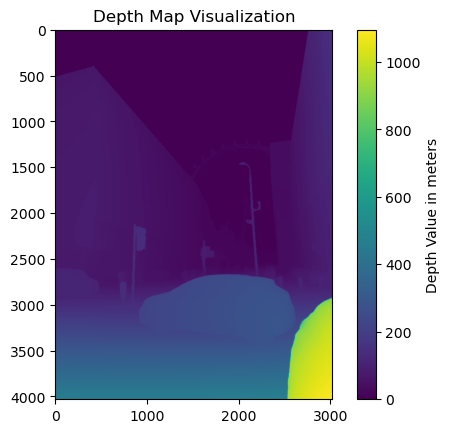

Test_Images_2/20241201_145402433_iOS.json
Test_Images_2/20241201_145402716_iOS.png
<class 'numpy.ndarray'>


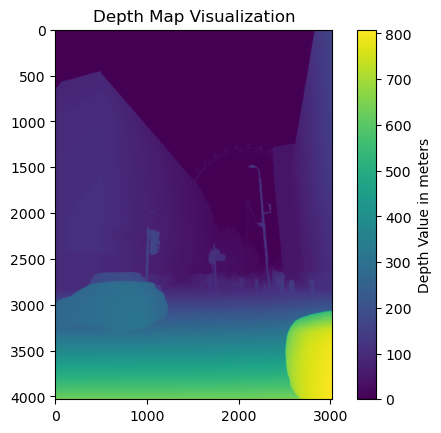

Test_Images_2/20241201_145402716_iOS.json
Test_Images_2/20241213_122050665_iOS.png
<class 'numpy.ndarray'>


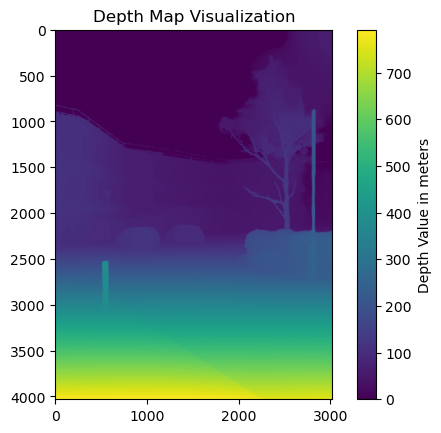

Test_Images_2/20241213_122050665_iOS.json
Test_Images_2/20241213_122159220_iOS.png
<class 'numpy.ndarray'>


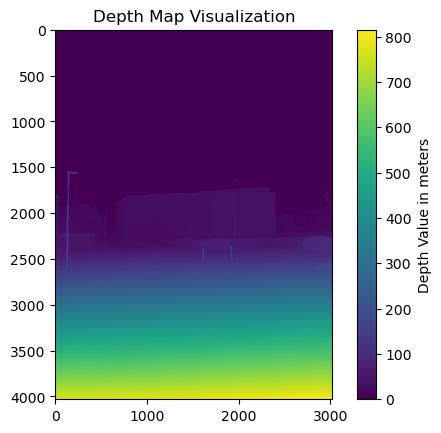

Test_Images_2/20241213_122159220_iOS.json
Test_Images_2/20241213_122200254_iOS.png
<class 'numpy.ndarray'>


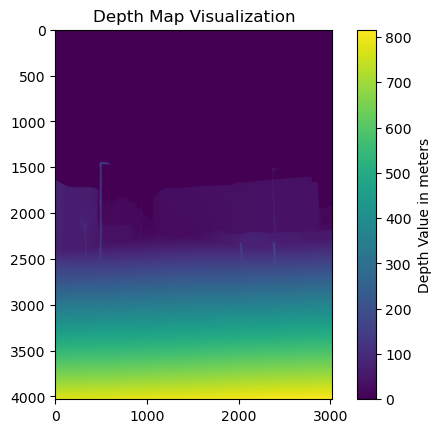

Test_Images_2/20241213_122200254_iOS.json


In [3]:
import cv2
import torch
import glob
import os
from depth_anything_v2.dpt import DepthAnythingV2
import matplotlib.pyplot as plt
import numpy as np
import json

DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vitl' # or 'vits', 'vitb', 'vitg'

model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_{encoder}.pth', map_location='cpu'))
model = model.to(DEVICE).eval()


# Specify the directory path
directory_path = 'Test_Images_2/'

# Use glob to find all .png files in the directory and its subdirectories
png_files = glob.glob(os.path.join(directory_path, '**', '*.png'), recursive=True)

# Print all .png files
for file in png_files:
    print(file)
    
    raw_img = cv2.imread(file)
    depth_map = model.infer_image(raw_img) # HxW raw depth map in numpy
    
    print(type(depth_map))

    plt.imshow(depth_map, cmap='viridis')  # You can use 'gray', 'hot', 'viridis', etc.
    plt.colorbar(label='Depth Value in meters')
    plt.title('Depth Map Visualization')
    plt.show()

    #Exporting as .npy file
    npy_file = file.replace('.png', '.npy')
    np.save(npy_file, depth_map)

    #Exporting as .json file
    arr_list = depth_map.tolist()
    jfile = file.replace('.png', '.json')
    with open(jfile, 'w') as json_file:
        print(jfile)
        json.dump(arr_list, json_file)



Required Additional modules

In [ ]:
%pip install transformers
%pip install Ipywidgets
%pip install matplotlib
%pip install pickleshare

Pre-trained model code and heat map visualisation

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


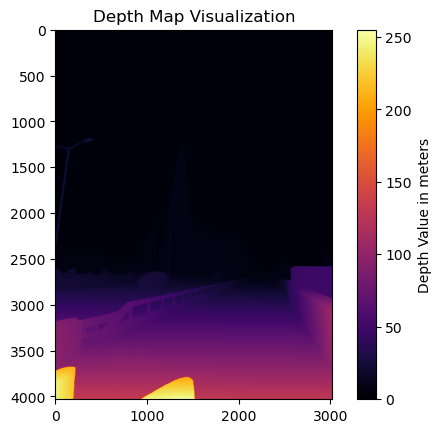

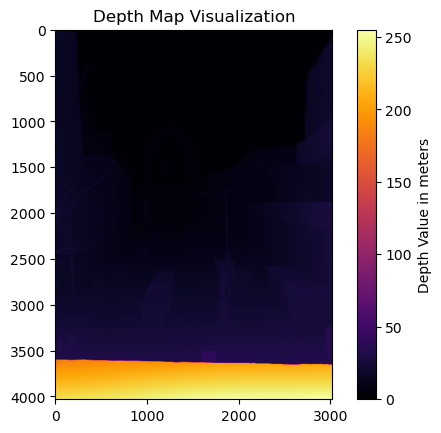

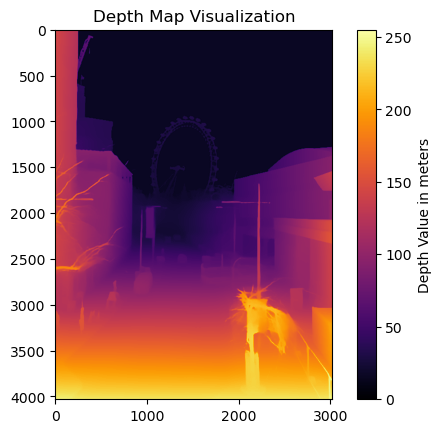

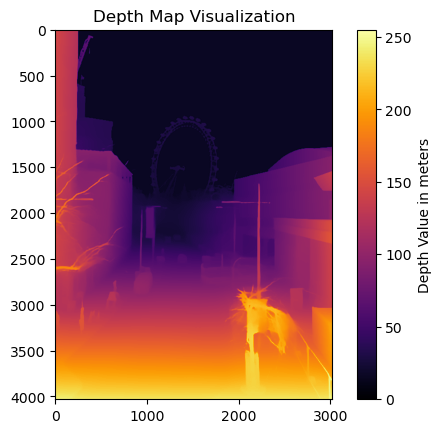

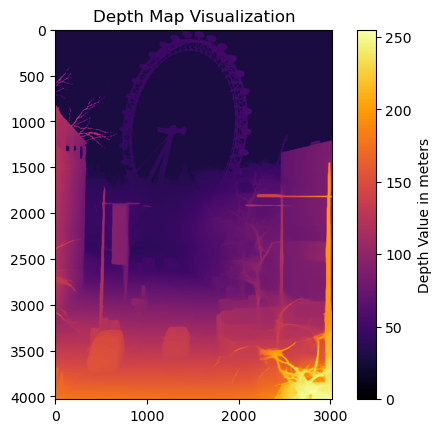

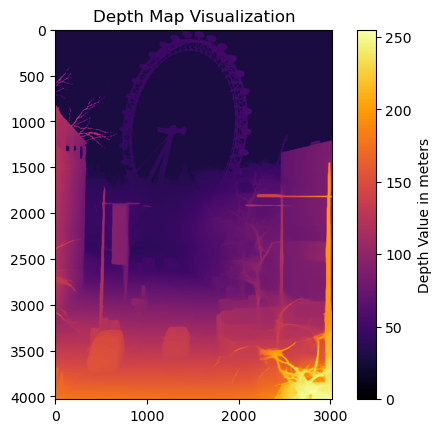

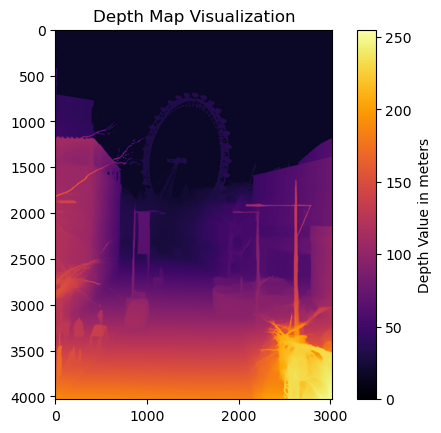

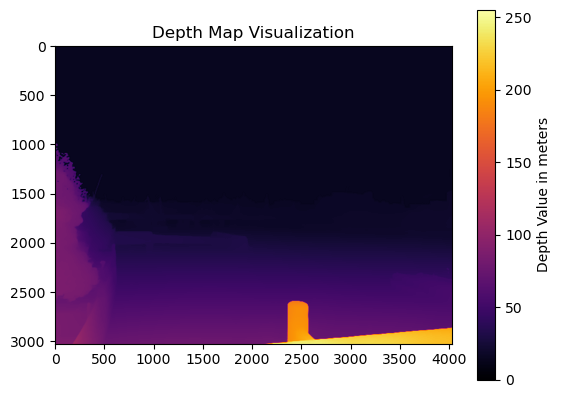

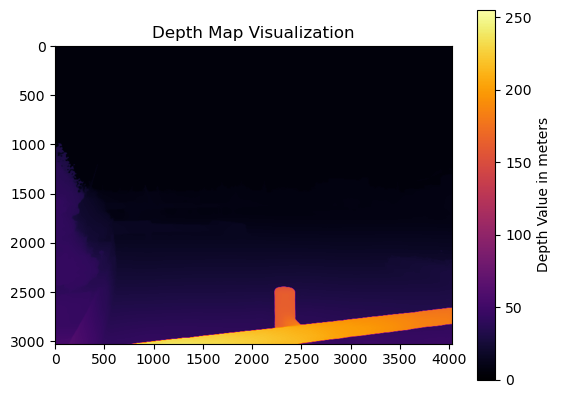

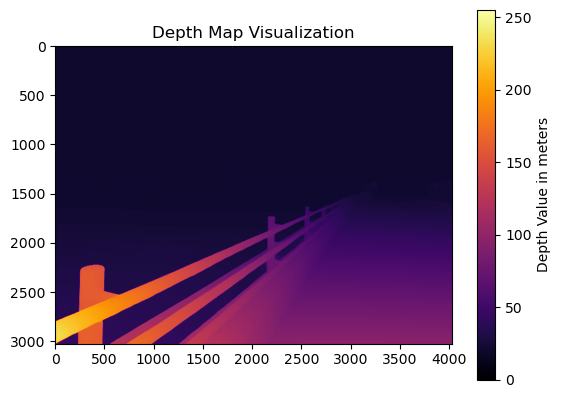

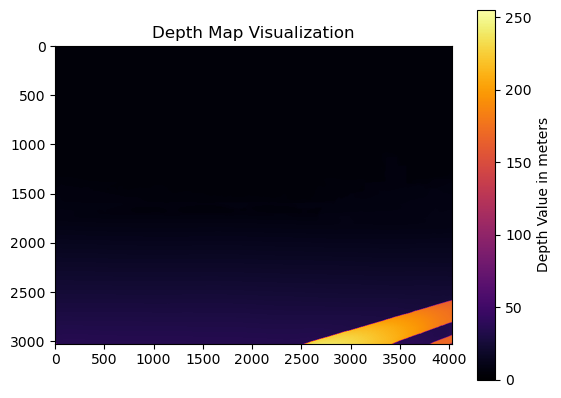

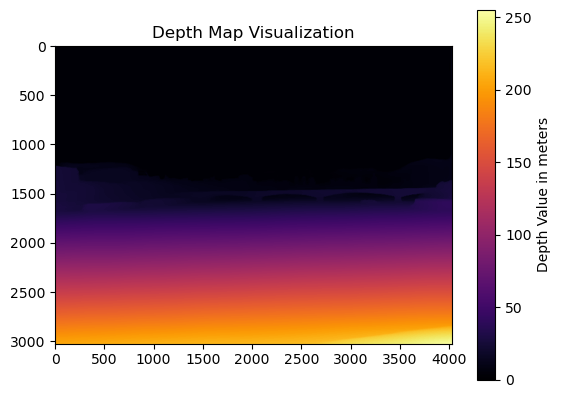

In [5]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Large-hf")


# Specify the directory path
directory_path = 'Test_Images_1/'

# Use glob to find all .png files in the directory and its subdirectories
png_files = glob.glob(os.path.join(directory_path, '**', '*.png'), recursive=True)

# Print all .png files
for file in png_files:
    image = Image.open(file)
    depth = pipe(image)["depth"]

    plt.imshow(depth, cmap='viridis')  # You can use 'gray', 'hot', 'viridis', etc.
    plt.colorbar(label='Depth Value in meters')
    plt.title('Depth Map Visualization')
    plt.show()

In [6]:
!python run.py --encoder vitl --img-path 'Test_Images_1/' --outdir 'Output/'

/transfer/s5708799/ASE/programming-project-ofayed/Depth Estimation Models/Depth-Anything-V2/run.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  depth_anything.load_stat

Using opencv on numpy depth file

In [26]:
import numpy as np

# Load the depth map from a .npy file
depth_map = np.load('metric_depth/output/oppen_raw_depth_meter.npy')
color_image = cv2.imread('metric_depth/Test_Images/oppen.png')  # BGR format
d_min = 0   # Minimum depth value
d_max = 4  # Maximum depth value



In [27]:
mask = (depth_map >= d_min) & (depth_map <= d_max)
# Create a 3-channel mask for the color image
mask_3channel = np.stack((mask,) * 3, axis=-1)

# Apply the mask: keep original colors where the mask is True, set others to black
filtered_color_image = np.where(mask_3channel, color_image, 0)
# Save the filtered color image
cv2.imwrite('filtered_oppen_image.png', filtered_color_image)



True

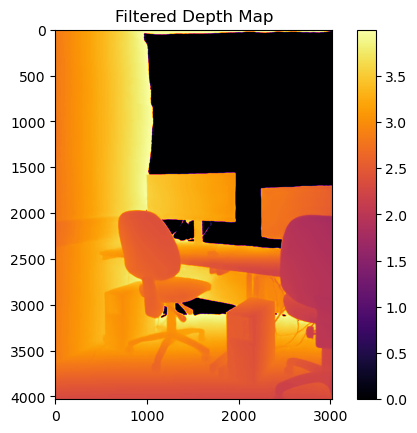

True

In [22]:
import matplotlib.pyplot as plt
import cv2

# Save the filtered depth map
np.save('filtered_depth.npy', filtered_depth)

# Visualize the depth map
plt.imshow(filtered_depth, cmap='inferno')
plt.title('Filtered Depth Map')
plt.colorbar()
plt.show()

# Optionally, save as an image file using OpenCV
cv2.imwrite('filtered_depth.png', filtered_depth)
